<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Neural_network_simple_linear_regression_multilayer_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

Defining a function to create data set

In [2]:
def function(x):
  return 10*x**2 - 5*x - 0.5 + e

Adding noises

In [3]:
e = (torch.rand(100)).reshape(-1,1)

In [4]:
x_train = torch.rand(100).reshape(-1,1)
x_train_square = x_train*x_train
y_train = function(x_train).reshape(-1,1)
x = torch.cat((x_train,x_train_square),1)

Visualize data

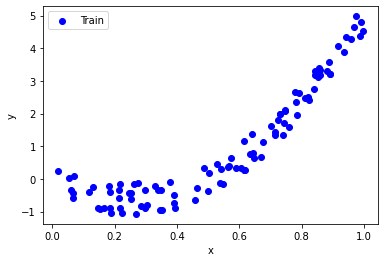

In [5]:
plt.scatter(x_train,y_train,label='Train',color='blue')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()

Creating single layer basic neural network

In [6]:
class Model(nn.Module):
  def __init__(self,in_features,h1,h2,out_features):

    super().__init__()
    
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [7]:
model = Model(2,8,9,1)


Defining cost function and optimization method

In [8]:
criterion = nn.MSELoss()

In [9]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

Training

In [ ]:
epochs = 10000
losses = []

for i in range(epochs):

  i = i + 1

  y_pred = model.forward(x) # Predicting on the forward pass

  loss = criterion(y_pred,y_train) #Calculating our loss

  losses.append(loss) # Recording the error

  print('epoch {} loss: {}'.format(i,loss.item()))

  optimizer.zero_grad() #reseting the gradient

  loss.backward()
  optimizer.step()

Optimization check

Text(0.5, 0, 'Epoch')

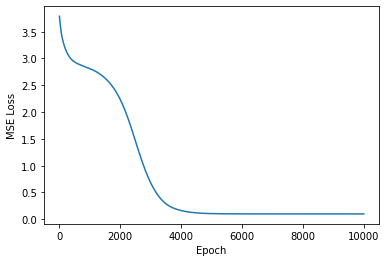

In [11]:
plt.plot(range(epochs),losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

Prediction and curve fitting

In [12]:
x_test = torch.linspace(0,1,100).reshape(-1,1)
x_test_square = x_test*x_test
#x_test_square = x_test*x_test
x_test_torch = torch.cat((x_test,x_test_square),1)
y_predicted = model.forward(x_test_torch)
#xt = torch.cat((x_test,x_test_square),1)

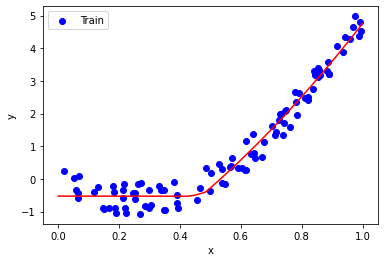

In [13]:
plt.scatter(x_train,y_train,label='Train',color='blue')
plt.plot(x_test,y_predicted.data.numpy(),'r')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.tight_layout
plt.show()